### Load and split the dataset
- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.
- Separate the features and target and then split the train data into train and validation set.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [61]:
# Code starts here
train = pd.read_csv('train.csv')
print(train.shape)
print(train.describe())



# Code ends here.

(8582, 11)
              ages   list_price  num_reviews  piece_count  play_star_rating  \
count  8582.000000  8582.000000  8582.000000  8582.000000       8582.000000   
mean     16.649149    64.493463    14.680727   486.677464          3.697809   
std       8.186261    89.871631    34.867561   802.789725          1.653742   
min       0.000000     2.272400     0.000000     1.000000          0.000000   
25%      11.000000    19.990000     1.000000    95.000000          3.600000   
50%      19.000000    36.587800     4.000000   214.000000          4.400000   
75%      23.000000    71.298000    12.000000   544.000000          4.700000   
max      30.000000  1104.870000   367.000000  7541.000000          5.000000   

       review_difficulty  star_rating   theme_name  val_star_rating  \
count        8582.000000  8582.000000  8582.000000      8582.000000   
mean            1.994640     3.904649    20.482172         3.597448   
std             1.792387     1.617678    11.948618         1.624

### Data Visualization

- All the features including target variable are continuous. 
- Check out the best plots for plotting between continuous features and try making some inferences from these plots. 

2.0


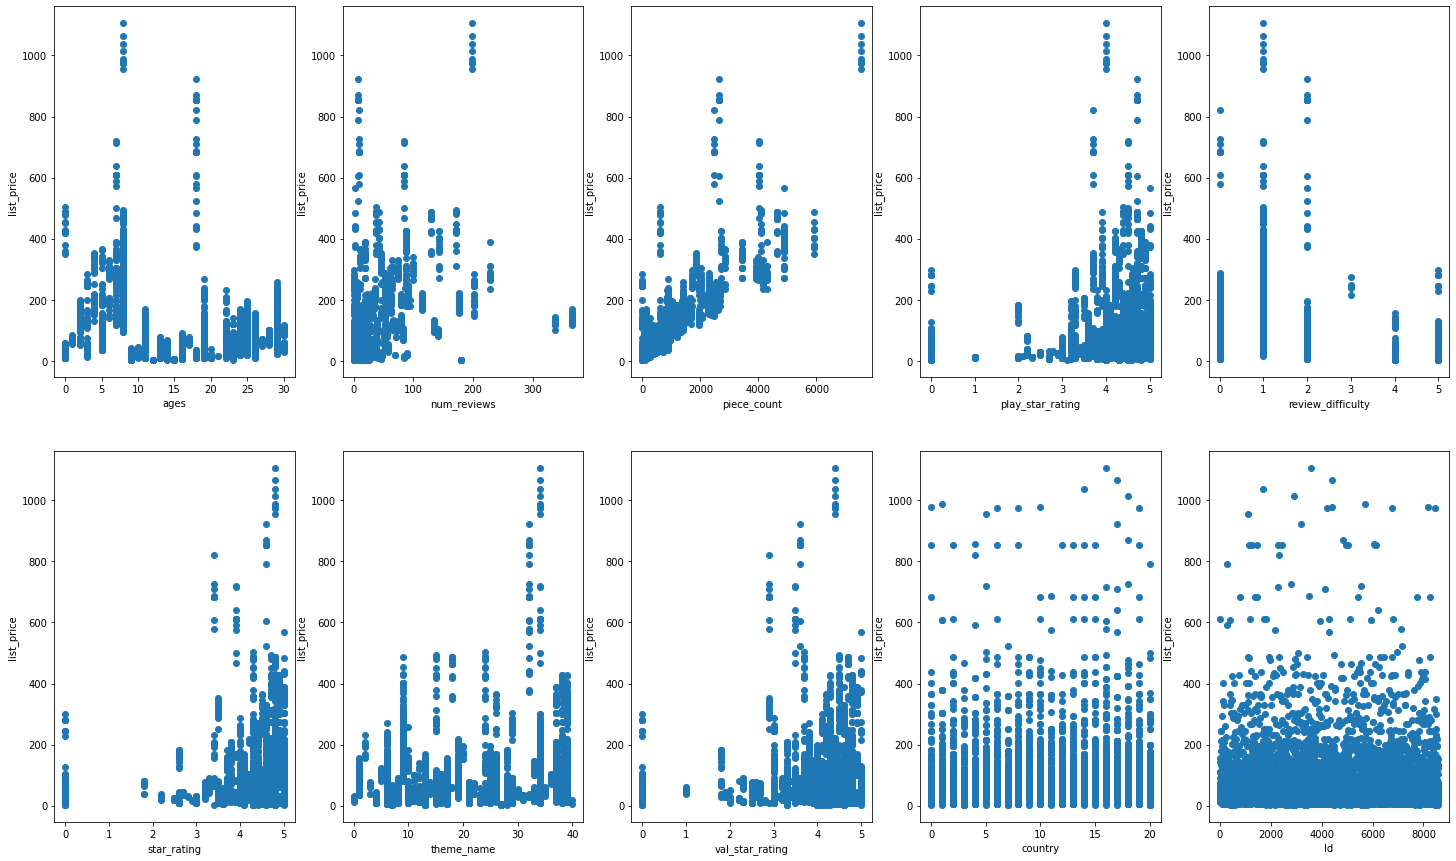

<AxesSubplot:xlabel='list_price', ylabel='Density'>

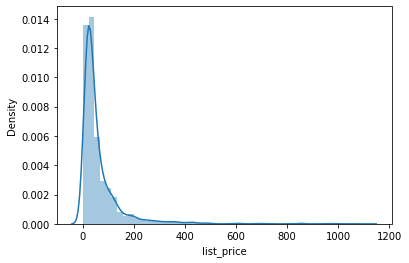

In [62]:
col = ["ages","num_reviews","piece_count","play_star_rating","review_difficulty","star_rating","theme_name","val_star_rating","country","Id"]
fig = plt.figure(figsize=(25,15))
cols = 5
rows = np.ceil(len(col)/cols)
print(rows)
for i,column in enumerate(col):
    ax = fig.add_subplot(rows,cols,i+1)
    plt.scatter(train[column],train['list_price'])
    ax.set(xlabel=column, ylabel="list_price")
plt.show()

sns.distplot(train['list_price'])
# Code ends here.

### Feature Selection
- Try selecting suitable threshold and accordingly drop the columns.

review_difficulty  play_star_rating    -0.670508
play_star_rating   review_difficulty   -0.670508
review_difficulty  val_star_rating     -0.650333
val_star_rating    review_difficulty   -0.650333
review_difficulty  star_rating         -0.637901
star_rating        review_difficulty   -0.637901
play_star_rating   ages                 0.232847
ages               play_star_rating     0.232847
num_reviews        list_price           0.439499
list_price         num_reviews          0.439499
theme_name         ages                 0.476178
ages               theme_name           0.476178
num_reviews        piece_count          0.542924
piece_count        num_reviews          0.542924
                   list_price           0.866119
list_price         piece_count          0.866119
star_rating        play_star_rating     0.902573
play_star_rating   star_rating          0.902573
val_star_rating    star_rating          0.908720
star_rating        val_star_rating      0.908720
val_star_rating    p

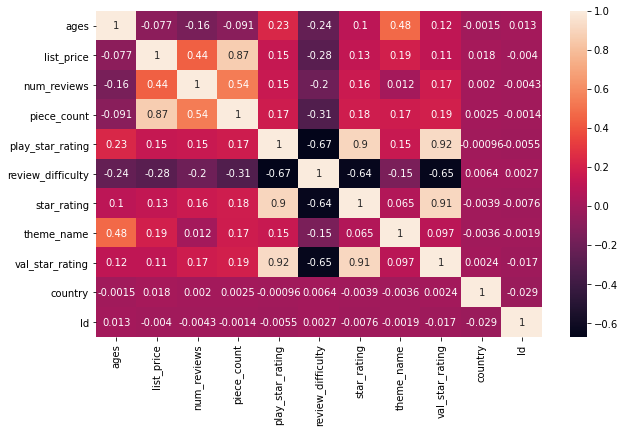

In [63]:
# Code starts here
train.corr()
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot = True)

# declare the thresold values
upper_threshold = 0.2
lower_threshold = -0.5

correlation = train.corr().unstack().sort_values(kind='quicksort')

# Select the highest correlation pairs
corr_var_list = correlation[((correlation>upper_threshold) | (correlation<lower_threshold)) & (correlation!=1)]
print(corr_var_list)



In [64]:
# drop columns from X_train
train.drop(['play_star_rating','val_star_rating','country','Id'],axis = 1 ,inplace=True)
train.head(10)

# Code ends here.

,ages,list_price,num_reviews,piece_count,review_difficulty,star_rating,theme_name
0,8,155.8800,202,2469,1,4.9,9
1,26,19.9900,9,252,0,4.6,39
2,26,91.6980,56,659,0,4.6,34
3,11,24.3878,1,19,5,4.0,13
4,7,609.9878,84,4016,1,3.9,34
5,3,42.6878,0,1,5,0.0,24
6,29,69.9900,19,944,0,4.2,38
7,11,42.6390,0,38,5,0.0,13
8,23,19.9900,2,139,2,4.0,39
9,22,20.2971,5,223,2,4.4,8


### Model building

In [65]:
# Separate into train and test data

x = train.drop(['list_price'],axis=1)
y = train[['list_price']]

x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.1,random_state=6)

print(x_train.head())
print(y_train.head())

      ages  num_reviews  piece_count  review_difficulty  star_rating  \
3362    19            5          701                  0          4.0   
5501    16            0           89                  5          0.0   
5777    26            0          104                  5          0.0   
2327    24           16          208                  2          4.6   
2976    13            0           85                  5          0.0   

      theme_name  
3362          15  
5501          25  
5777          34  
2327          26  
2976          21  
      list_price
3362     71.8800
5501     12.9870
5777     36.5878
2327     19.9900
2976     36.5878


In [53]:
# Code starts here
linregression = LinearRegression()
linregression.fit(x_train,y_train)
y_pred = linregression.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error is:",mse)

# Calculate r2_score
r2 = r2_score(y_test, y_pred)
print("R2 score is:",r2)
# Code ends here


Mean squared error is: 1882.1836642845506
R2 score is: 0.8033416277844485


### Residual check!

- Check the distribution of the residual.

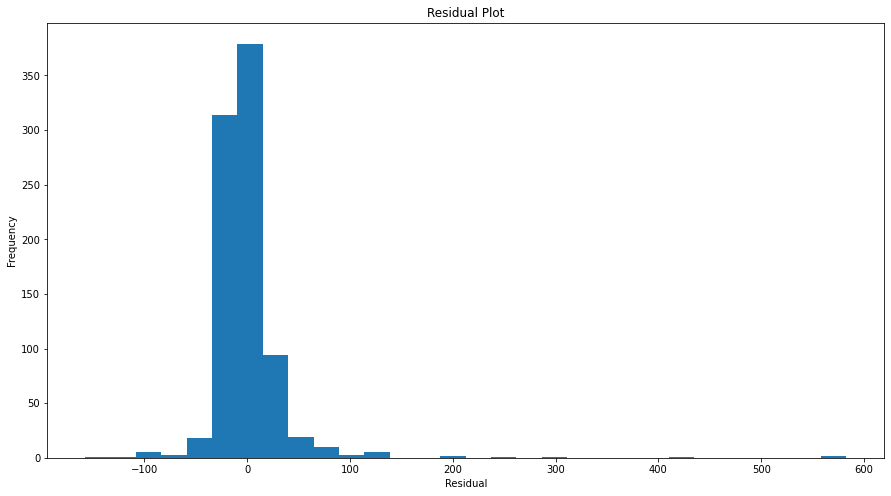

In [66]:
residual = (y_test - y_pred)
plt.figure(figsize=(15,8))
plt.hist(residual, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Plot")
plt.show()


# Code ends here.

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [68]:
# Code starts here
test = pd.read_csv("test.csv")

# Storing the id from the test file
Id = test['Id']

# Dropping the same columns from the test data
test.drop(['Id','play_star_rating','val_star_rating','country'],1,inplace=True)

# Predict on the test data
y_pred_test = linregression.predict(test)

ID = pd.Series(Id)
my_list = map(lambda x: x[0], y_pred_test)
preds = pd.Series(my_list)
final_result = pd.DataFrame({'Id':ID,'list_price':preds})
final_result = final_result.astype(int)

# Convert the sample submission file into a csv file
final_result.to_csv('final_result.csv',index=False)

# Code ends here.










# Code ends here.